In [2]:
import pandas as pd
DATA = r"C:\Users\KIIT\Desktop\ONGC\SDN Dataset\mapped_dataset.csv"
file_path = DATA
df = pd.read_csv(file_path)

In [3]:
df

,label,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,Protocol
0,0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,...,14428310,451,0,3,143928631,3917,0,0.0,0.0,1
1,0,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,...,14424046,451,0,4,3842,3520,0,0.0,0.0,1
2,0,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,...,14427244,451,0,1,3795,1242,0,0.0,0.0,1
3,0,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,...,14427244,451,0,2,3688,1492,0,0.0,0.0,1
4,0,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,...,14427244,451,0,3,3413,3665,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,0,5262,3,79,7742,81,842000000,8.184200e+10,5,10,...,2842,0,0,1,15209,12720,1,1.0,2.0,0
104341,0,5262,3,79,7742,81,842000000,8.184200e+10,5,10,...,2842,0,0,3,15099,14693,1,1.0,2.0,0
104342,0,5262,3,31,3038,31,805000000,3.180500e+10,5,10,...,2940,1,0,2,3409,3731,0,0.0,0.0,0
104343,0,5262,3,31,3038,31,805000000,3.180500e+10,5,10,...,2940,1,0,1,15209,12720,1,1.0,2.0,0


### Gradient Boosting 

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix
# Step 1: Load the dataset
file_path = DATA
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df.drop('label', axis=1)
y = df['label']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## logloss and auc
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, gb_model.predict_proba(X_test))
print("AUC: {:.7f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

import joblib
# Save the trained classifier model to a file
model_filename = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\SDN\GB.pkl"
joblib.dump(gb_model, model_filename)

Accuracy: 0.996693660453304
Confusion Matrix:
[[12676    46]
 [   23  8124]]
AUC: 0.9967805
Log Loss: 0.0256


['C:\\Users\\KIIT\\Desktop\\SEM-VII\\Major Project\\SDN\\GB.pkl']

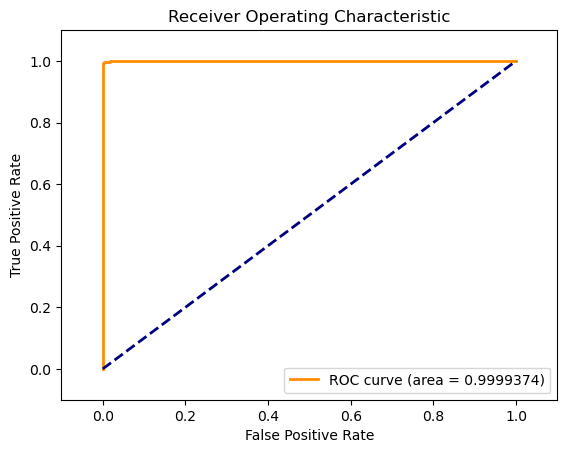

In [47]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.7f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix

# Step 1: Load the dataset
file_path = DATA
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df.drop('label', axis=1)
y = df['label']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## logloss and auc
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, rf_model.predict_proba(X_test))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

import joblib
# Save the trained classifier model to a file
model_filename = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\SDN\RF.pkl"
joblib.dump(rf_model, model_filename)


Accuracy: 1.0
Confusion Matrix:
[[12722     0]
 [    0  8147]]
AUC: 1.0000
Log Loss: 0.0020


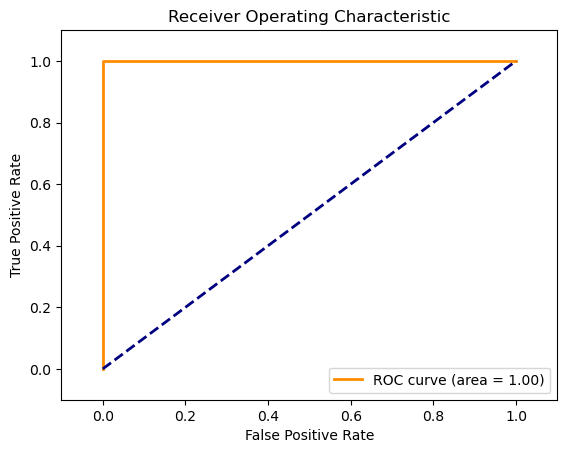

In [18]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix

# Step 1: Load the dataset
file_path = DATA
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df.drop('label', axis=1)
y = df['label']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Step 6: Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## logloss and auc
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, dt_model.predict_proba(X_test))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

import joblib
# Save the trained classifier model to a file
model_filename = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\SDN\DT.pkl"
joblib.dump(dt_model, model_filename)

Accuracy: 0.9999520820355551
Confusion Matrix:
[[12722     0]
 [    1  8146]]
AUC: 0.9999
Log Loss: 0.0017


['C:\\Users\\KIIT\\Desktop\\SEM-VII\\Major Project\\SDN\\DT.pkl']

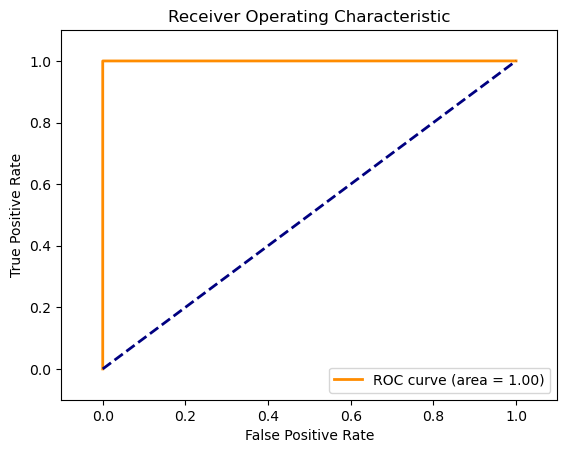

In [19]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Extra Tree (Extremely Randomized Trees)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix

# Step 1: Load the dataset
file_path = DATA
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df.drop('label', axis=1)
y = df['label']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Extra Trees model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = et_model.predict(X_test)

# Step 6: Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## logloss and auc
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, et_model.predict_proba(X_test))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

import joblib
# Save the trained classifier model to a file
model_filename = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\SDN\ET.pkl"
joblib.dump(et_model, model_filename)


Accuracy: 0.9996645742488859
Confusion Matrix:
[[12717     5]
 [    2  8145]]
AUC: 0.9997
Log Loss: 0.0070


['C:\\Users\\KIIT\\Desktop\\SEM-VII\\Major Project\\SDN\\ET.pkl']

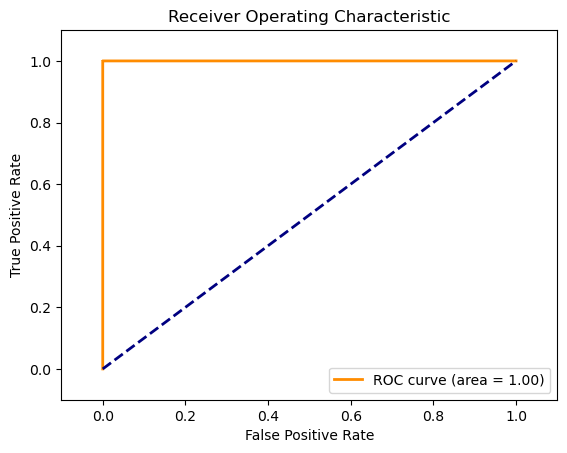

In [22]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, et_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Adaboost

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix

# Step 1: Load the dataset
file_path = DATA
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df.drop('label', axis=1)
y = df['label']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the AdaBoost model
base_model = DecisionTreeClassifier(max_depth=1)  # Weak learner (e.g., decision tree with max_depth=1)
adaboost_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

# Step 6: Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## logloss and auc
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, adaboost_model.predict_proba(X_test))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

import joblib
# Save the trained classifier model to a file
model_filename = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\SDN\AdaB.pkl"
joblib.dump(adaboost_model, model_filename)


Accuracy: 0.9979874454933154
Confusion Matrix:
[[12692    30]
 [   12  8135]]
AUC: 0.9981
Log Loss: 0.5371


['C:\\Users\\KIIT\\Desktop\\SEM-VII\\Major Project\\SDN\\AdaB.pkl']

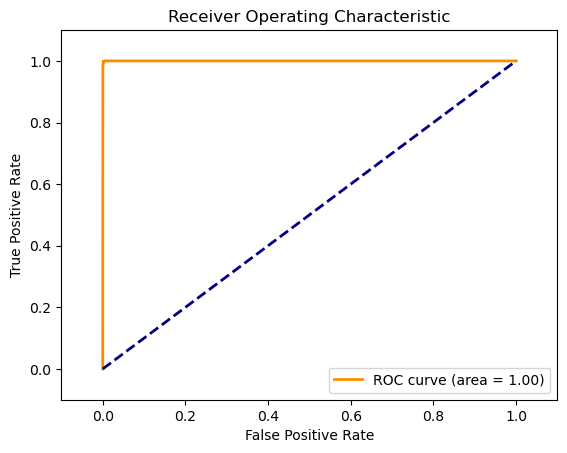

In [25]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, adaboost_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Neural Network

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix

# Step 1: Load the dataset
file_path = DATA
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df.drop('label', axis=1)
y = df['label']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 5: Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 6: Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Step 8: Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

auc = roc_auc_score(y_test, y_pred)
print("AUC: {:.4f}".format(auc))

# Step 9: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

import joblib
# Save the trained classifier model to a file
model_filename = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\SDN\NN.pkl"
joblib.dump(model, model_filename)

Epoch 1/10
2609/2609 [==============================] - 5s 2ms/step - loss: 312245504.0000 - accuracy: 0.5356 - val_loss: 311133376.0000 - val_accuracy: 0.6164
Epoch 2/10
2609/2609 [==============================] - 5s 2ms/step - loss: 179001248.0000 - accuracy: 0.5466 - val_loss: 180640592.0000 - val_accuracy: 0.6184
Epoch 3/10
2609/2609 [==============================] - 5s 2ms/step - loss: 122369152.0000 - accuracy: 0.5526 - val_loss: 53673284.0000 - val_accuracy: 0.5245
Epoch 4/10
2609/2609 [==============================] - 7s 3ms/step - loss: 112229184.0000 - accuracy: 0.5565 - val_loss: 102674008.0000 - val_accuracy: 0.6186
Epoch 5/10
2609/2609 [==============================] - 7s 3ms/step - loss: 85792544.0000 - accuracy: 0.5635 - val_loss: 21742906.0000 - val_accuracy: 0.6512
Epoch 6/10
2609/2609 [==============================] - 7s 3ms/step - loss: 59416172.0000 - accuracy: 0.5691 - val_loss: 50828060.0000 - val_accuracy: 0.3971
Epoch 7/10
2609/2609 [=======================

['C:\\Users\\KIIT\\Desktop\\SEM-VII\\Major Project\\SDN\\NN.pkl']

Confusion Matrix:
[[9939 2783]
 [4914 3233]]
653/653 [==============================] - 1s 984us/step
AUC: 0.5890
Log Loss: nan
 85/653 [==>...........................] - ETA: 0s

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2442: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2442: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


653/653 [==============================] - 1s 1ms/step


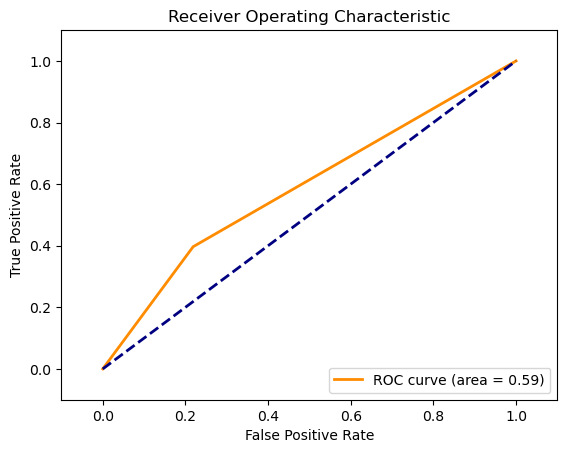

In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## logloss and auc
auc_score = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, model.predict(X_test))
print("AUC: {:.4f}".format(auc_score))
print("Log Loss: {:.4f}".format(logloss))

# Plot ROC Curve for Neural Network Model
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Ensemble Voting Method

In [38]:
MODEL_GB = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\SDN\GB.pkl"
MODEL_RF = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\SDN\RF.pkl"
MODEL_DT = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\SDN\DT.pkl"
MODEL_ET = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\SDN\ET.pkl"
MODEL_AdaB = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\SDN\AdaB.pkl"
MODEL_NN = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\SDN\NN.pkl"

Confusion Matrix:
[[12720     2]
 [    0  8147]]
Accuracy: 0.99990416
Log Loss: 0.0020
AUC: 0.99992140


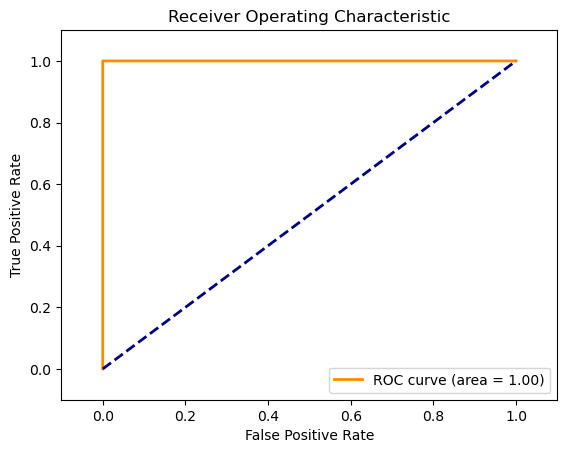

In [44]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, matthews_corrcoef, log_loss, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss,auc, roc_score

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def load_models(model_paths):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        models.append(model)
    return models

def ensemble_voting(models, data):
    predictions = []
    for model in models:
        prediction = model.predict(data)
        predictions.append(prediction.astype(int))  # Convert predictions to integers
    final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
    return final_predictions

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop('label', axis=1)  
    y = dataset['label']  

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Load the ensemble models
    models = load_models(model_paths)

    # Make predictions using ensemble voting on the test set
    final_predictions = ensemble_voting(models, X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    
    # Calculate the AUC
    auc = roc_auc_score(y_test, final_predictions)

    # Calculate the log loss using one of the models (assuming they have similar outputs)
    logloss = log_loss(y_test, models[0].predict_proba(X_test))
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.8f}".format(accuracy))
    print("Log Loss: {:.4f}".format(logloss))
    print("AUC: {:.8f}".format(auc))
    # Calculate the predicted probabilities for ensemble voting
    ensemble_probs = np.mean([model.predict_proba(X_test) for model in models], axis=0)

    # Plot the ROC curve for ensemble predictions
    plot_roc_curve(y_test, ensemble_probs[:, 1])

if __name__ == "__main__":
    dataset_path = DATA  # Replace with the actual path to your dataset
    model_paths = [MODEL_RF,MODEL_DT, MODEL_ET, MODEL_AdaB, MODEL_GB] # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)